# Detectron2 Detect Chess Detection

![](https://www.kaggleusercontent.com/kf/31432124/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..ItG1ZBG8pDX64qXwRigYFA.E0Q8hYB_ogbIArn0lLlj6rAyKyB3ST-1b4j5CoStpKxZICZFggefAkPeuB5s51Oket_StaCQ7MKBmL2-e2VcE4CTxsheqTJXNKW5VV0QAI3cYoTMr6RVs5BytYset3NW03bQ0VTZAxv2rGM6pZzOkv_LiOF4JWSfkOOiPZoiolNZhvppo1lWrAY7uY3uby92rKwniWuqwhTKJHZ0m2HVeQXwuVYOaVPqbR2vLCzgjRCKDs06sfb29F3I8ei0lo-kICmQ2PaWBUcviZBcm1cvK_zHdyk-6fCqQFHUhptPGJSGqrfb4oxh0uGH2MRioS3IoNXNaXkdN8IoeWOhHljw3UGSl8S1oo-mFs52U9Z61ebZKENbTq0PF8rFEhw5kGX_9jcl6M0uqijvuykl8qJtkVPfHUgin-j0SgZZ4NmLxxDwTe4WDTgJNScw9WOuL-osvkMs4E24swyQ322Hu52eeQSVWoIMC0TPznemgnkf2olKXSkOnv0MNgX7JYL9u0jaybhwJ3BF19nEwiO1xFQdp7TBKRZ6reC_BdNjBx6WGgKVblpS_o0GiTFreNouXEVkHmzZeeusBJd9rtTmHN_t_fRuNaJ17vxvnMHv3DlJLb18kQ3PHQDoOHqvp8yIx45M_BFcN40i-8ipgBaaBiYxd4fsX3haD9xIzi7OcejCeJs.zMaxqcYltMYR59gJVAA_wA/__results___files/__results___10_1.png)

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/Object-Detection-and-Image-Segmentation-with-Detectron2/blob/master/Detectron2_Detect_Chess_Detection.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/Object-Detection-and-Image-Segmentation-with-Detectron2/blob/master/Detectron2_Detect_Chess_Detection.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

## Install detectron2

> **Important**: If you're running on a local machine, be sure to follow the [installation instructions](https://github.com/facebookresearch/detectron2/blob/master/INSTALL.md). This notebook includes only what's necessary to run in Colab.

In [1]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 25kB/s 
     |████████████████████████████████| 4.1MB 16.3MB/s 
  Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0
  Found existing installation: torchvision 0.5.0
    Uninstalling torchvision-0.5.0:
      Successfully uninstalled torchvision-0.5.0
     |████████████████████████████████| 276kB 5.0MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=f5f73493e1427677e2bfa9ab0d5f213836da1da060ee6566d5bb1524516aeb4a
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-q7mqf__8
  Running command git 

In [2]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html
     |████████████████████████████████| 6.2MB 6.5MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.dev200325-cp36-none-any.whl size=38930 sha256=eaaec9ccd5c4f92e16c537001d7279fe5a0d2fa0d64334d5ef1cecc491d764dc
  Stored in directory: /root/.cache/pip/wheels/58/4f/d1/6b0ada294145df5fe73092d9849d27be5b5b720fd8cfdd1b98
Successfully built fvcore


## Get data

In [0]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# import some common detectron2 utilities


import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

Before we can start training our model we need to download our data-set. In this case we will use my microcontroller detection data-set, which is [available on Kaggle](https://www.kaggle.com/tannergi/microcontroller-detection).

In [4]:
# Install Kaggle API
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 4.1MB/s 
     |████████████████████████████████| 5.3MB 7.7MB/s 
     |████████████████████████████████| 112kB 54.4MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 112kB 60.7MB/s 


If you are working in Colab you need to add the username and key contained in your kaggle.json file to your environment using os.

In [0]:
# only for google colab
import os
os.environ['KAGGLE_USERNAME'] = "<username>" 
os.environ['KAGGLE_KEY'] = "<password>"

In [6]:
!kaggle datasets download -d tannergi/chess-piece-detection

 82% 137M/166M [00:01<00:00, 50.1MB/s]
100% 166M/166M [00:02<00:00, 84.1MB/s]


In [7]:
!unzip chess-piece-detection.zip

Archive:  chess-piece-detection.zip
  inflating: Chess Detection/annotations/IMG_1989.xml  
  inflating: Chess Detection/annotations/IMG_1990.xml  
  inflating: Chess Detection/annotations/IMG_1991.xml  
  inflating: Chess Detection/annotations/IMG_1992.xml  
  inflating: Chess Detection/annotations/IMG_1993.xml  
  inflating: Chess Detection/annotations/IMG_1994.xml  
  inflating: Chess Detection/annotations/IMG_1995.xml  
  inflating: Chess Detection/annotations/IMG_1996.xml  
  inflating: Chess Detection/annotations/IMG_1997.xml  
  inflating: Chess Detection/annotations/IMG_1998.xml  
  inflating: Chess Detection/annotations/IMG_1999.xml  
  inflating: Chess Detection/annotations/IMG_2000.xml  
  inflating: Chess Detection/annotations/IMG_2001.xml  
  inflating: Chess Detection/annotations/IMG_2002.xml  
  inflating: Chess Detection/annotations/IMG_2003.xml  
  inflating: Chess Detection/annotations/IMG_2004.xml  
  inflating: Chess Detection/annotations/IMG_2005.xml  
  inflating:

## Register data-set

In order to use a dataset with Detectron2 we need to register it. For more information check out the [official documentation](https://detectron2.readthedocs.io/tutorials/datasets.html#register-a-dataset).

In [0]:
import os
import numpy as np
import json
from detectron2.structures import BoxMode
import itertools
import cv2
import xml.etree.ElementTree as ET


# write a function that loads the dataset into detectron2's standard format
def get_dataset_dicts(annotation_path, image_path):
    classes = ['white-rook', 'white-knight', 'white-bishop', 'white-king', 'white-queen', 'white-pawn', 'black-rook', 'black-knight', 'black-bishop', 'black-king', 'black-queen', 'black-pawn']

    dataset_dicts = []
    for filename in os.listdir(annotation_path):
        record = {}
        root = ET.parse(os.path.join(annotation_path, filename)).getroot()
        record["file_name"] = os.path.join(image_path, root.find('filename').text)
        record["height"] = 2248
        record["width"] = 4000

        objs = []
        for member in root.findall('object'):
          obj = {
              'bbox': [int(member[4][0].text), int(member[4][1].text), int(member[4][2].text), int(member[4][3].text)],
              'bbox_mode': BoxMode.XYXY_ABS,
              'category_id': classes.index(member[0].text),
              "iscrowd": 0
          }
          objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

In [0]:
from detectron2.data import DatasetCatalog, MetadataCatalog

classes = ['white-rook', 'white-knight', 'white-bishop', 'white-king', 'white-queen', 'white-pawn', 'black-rook', 'black-knight', 'black-bishop', 'black-king', 'black-queen', 'black-pawn']

DatasetCatalog.register('chess_piece_dataset', lambda: get_dataset_dicts('Chess Detection/annotations', 'Chess Detection/images'))
MetadataCatalog.get('chess_piece_dataset').set(thing_classes=classes)
chess_metadata = MetadataCatalog.get('chess_piece_dataset')

We can check if our code works correctly by plotting a few images.

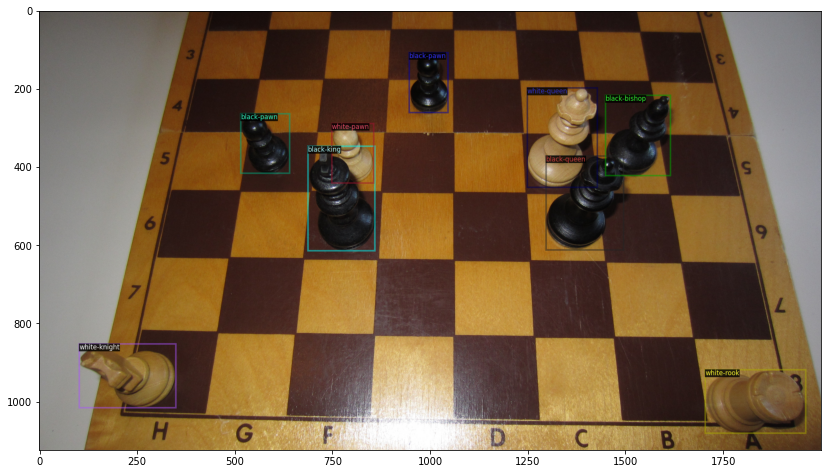

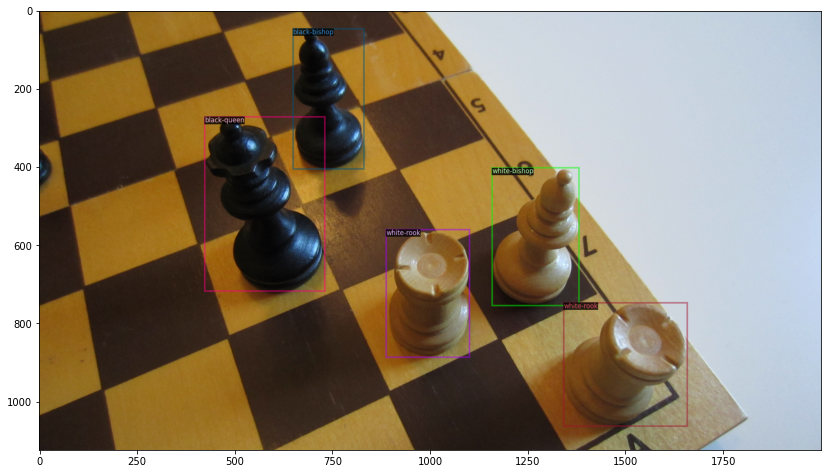

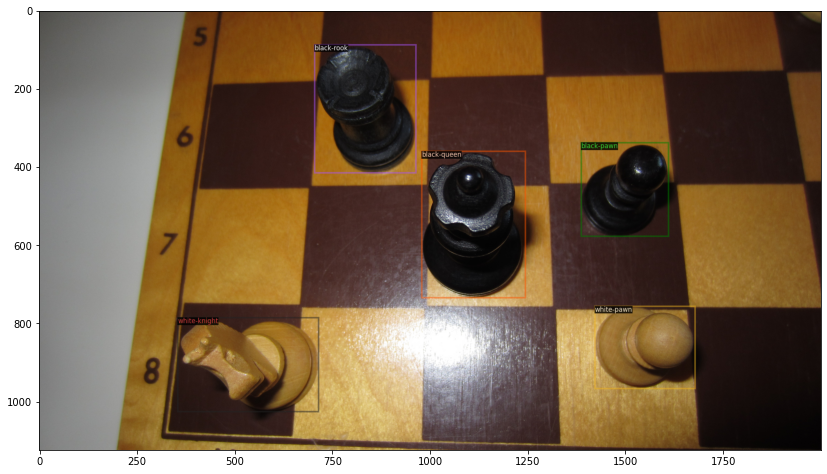

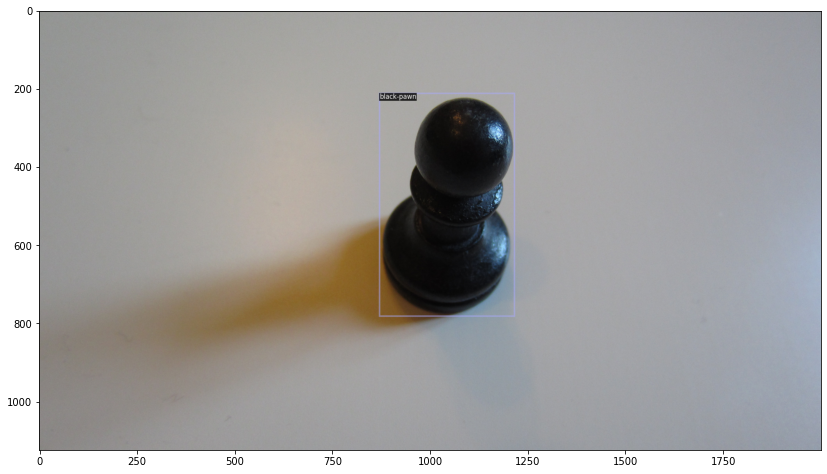

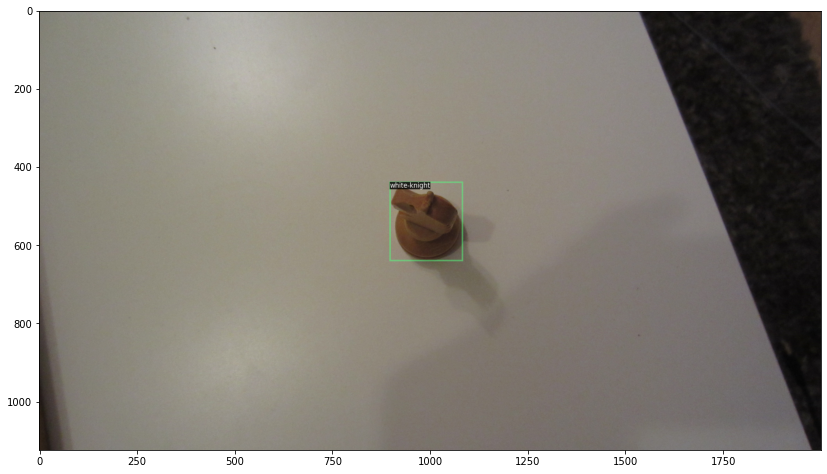

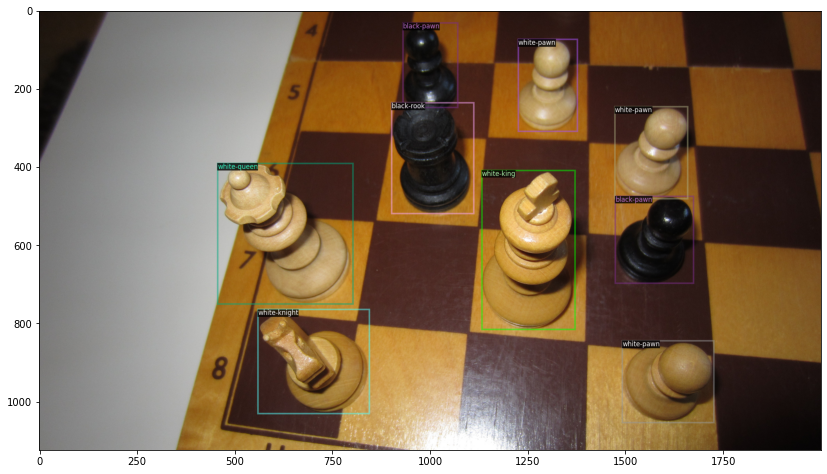

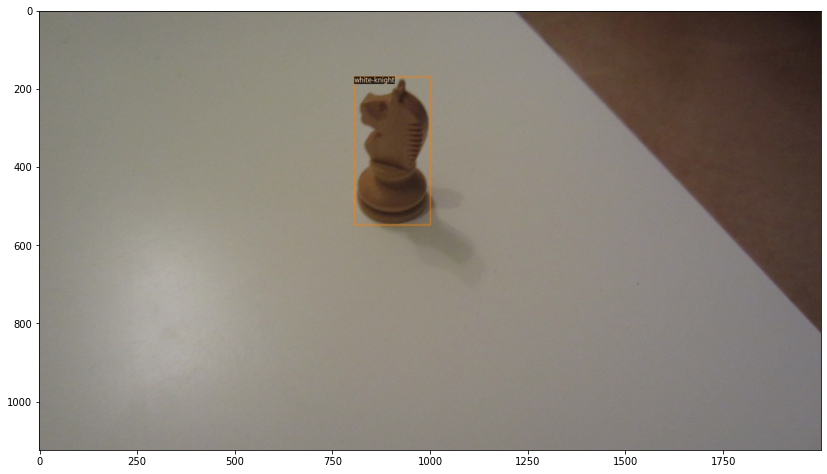

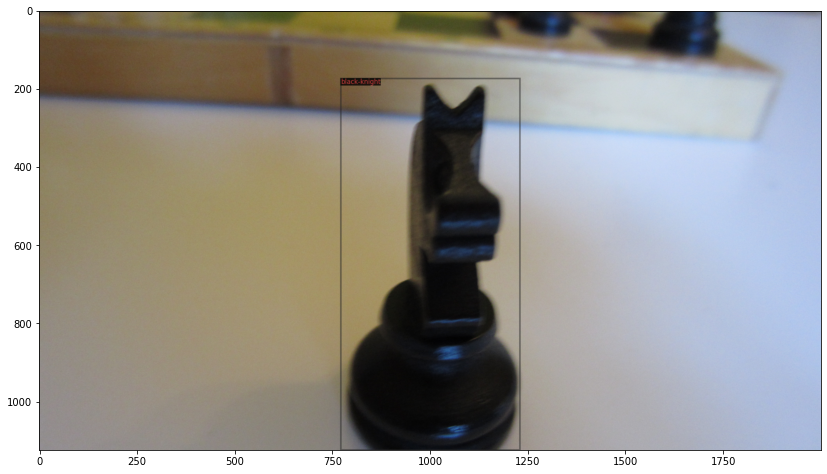

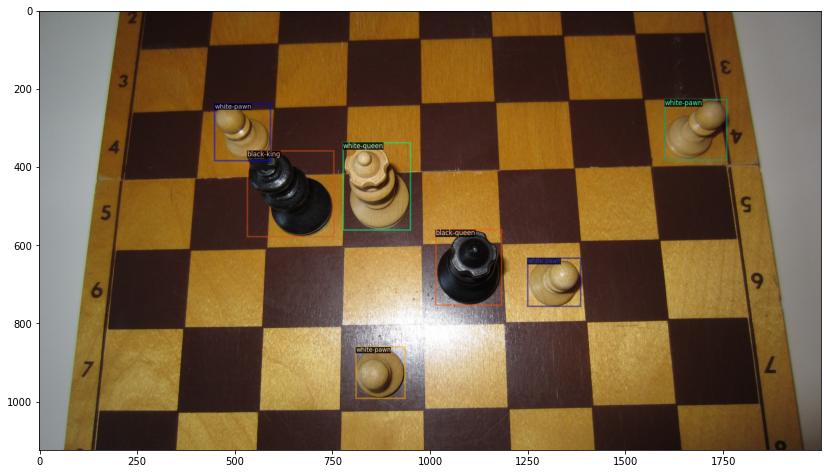

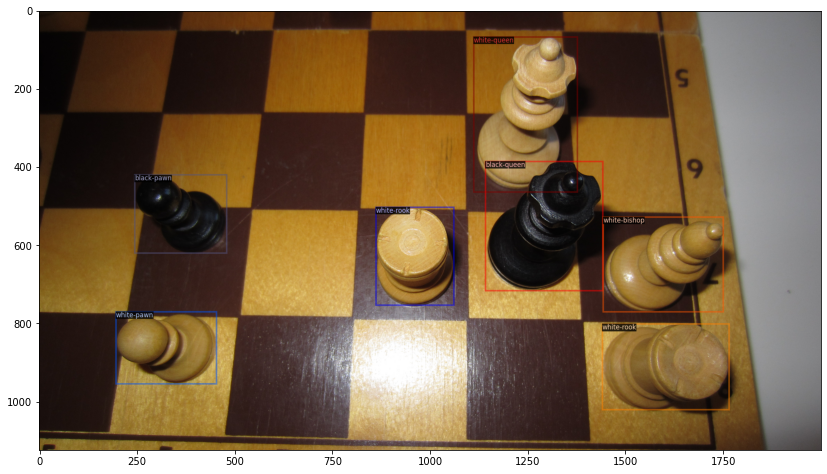

In [10]:
import random
from detectron2.utils.visualizer import Visualizer

dataset_dicts = DatasetCatalog.get('chess_piece_dataset')
for d in random.sample(dataset_dicts, 10):
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1], metadata=chess_metadata, scale=0.5)
    v = v.draw_dataset_dict(d)
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

## Train model

In [11]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ('chess_piece_dataset',)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 12

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[04/05 10:35:04 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f6e8b1.pkl: 243MB [00:03, 69.6MB/s]                           
'roi_heads.box_predictor.cls_score.weight' has shape (81, 1024) in the checkpoint but (13, 1024) in the model! Skipped.
'roi_heads.box_predictor.cls_score.bias' has shape (81,) in the checkpoint but (13,) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.weight' has shape (320, 1024) in the checkpoint but (48, 1024) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.bias' has shape (320,) in the checkpoint but (48,) in the model! Skipped.


[04/05 10:35:10 d2.engine.train_loop]: Starting training from iteration 0
[04/05 10:35:27 d2.utils.events]:  eta: 0:13:29  iter: 19  total_loss: 2.366  loss_cls: 1.928  loss_box_reg: 0.490  loss_rpn_cls: 0.009  loss_rpn_loc: 0.008  time: 0.8300  data_time: 0.4453  lr: 0.000400  max_mem: 3661M
[04/05 10:35:43 d2.utils.events]:  eta: 0:13:03  iter: 39  total_loss: 1.089  loss_cls: 0.519  loss_box_reg: 0.506  loss_rpn_cls: 0.002  loss_rpn_loc: 0.008  time: 0.8111  data_time: 0.3807  lr: 0.000799  max_mem: 3661M
[04/05 10:35:59 d2.utils.events]:  eta: 0:12:47  iter: 59  total_loss: 1.021  loss_cls: 0.468  loss_box_reg: 0.523  loss_rpn_cls: 0.001  loss_rpn_loc: 0.009  time: 0.8130  data_time: 0.4042  lr: 0.001199  max_mem: 3661M
[04/05 10:36:15 d2.utils.events]:  eta: 0:12:30  iter: 79  total_loss: 1.014  loss_cls: 0.449  loss_box_reg: 0.550  loss_rpn_cls: 0.000  loss_rpn_loc: 0.007  time: 0.8105  data_time: 0.3930  lr: 0.001598  max_mem: 3661M
[04/05 10:36:31 d2.utils.events]:  eta: 0:12:1

## Use model for inference

Now, we can perform inference on our validation set by creating a predictor object.

In [0]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
cfg.DATASETS.TEST = ("chess_piece_dataset", )
predictor = DefaultPredictor(cfg)

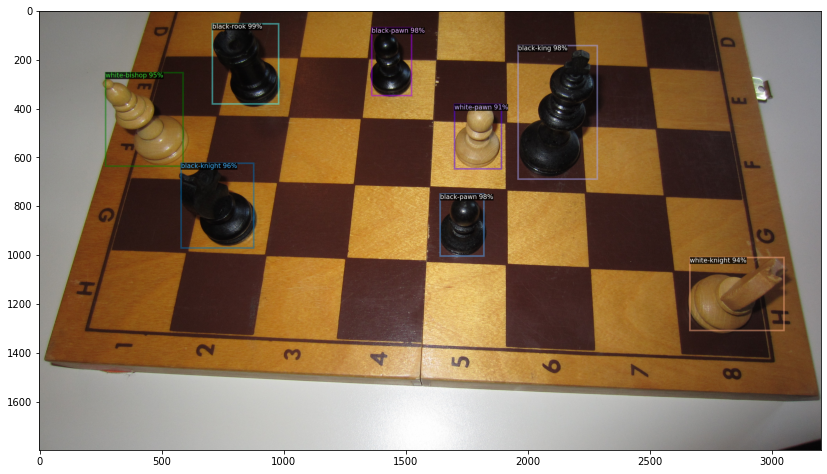

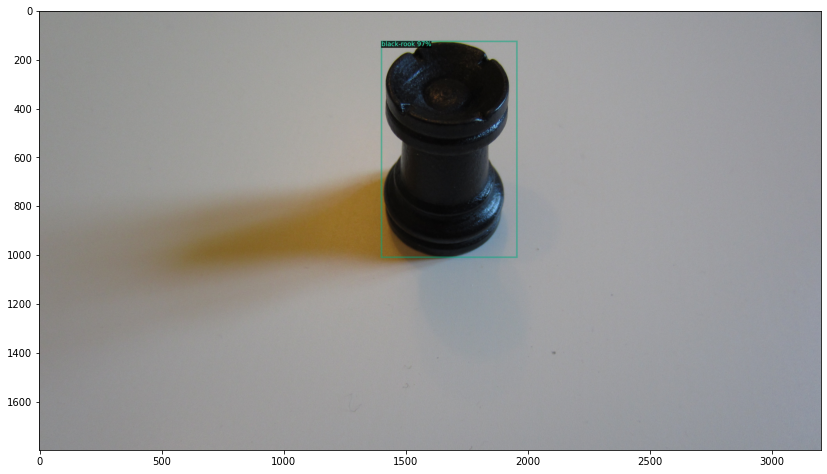

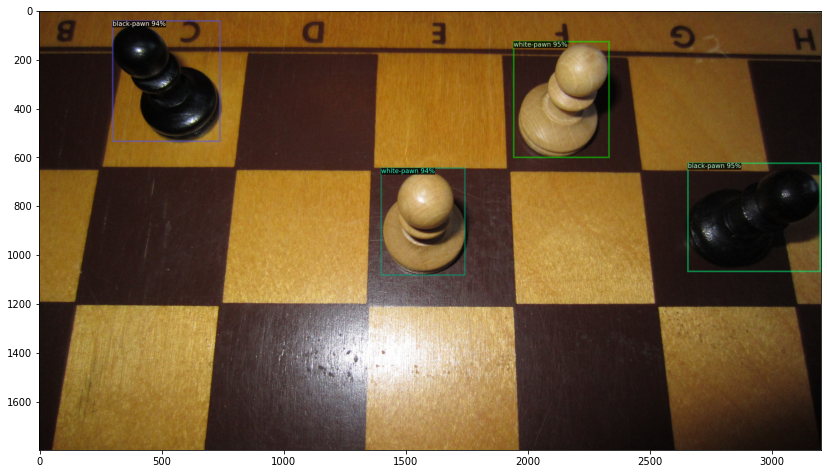

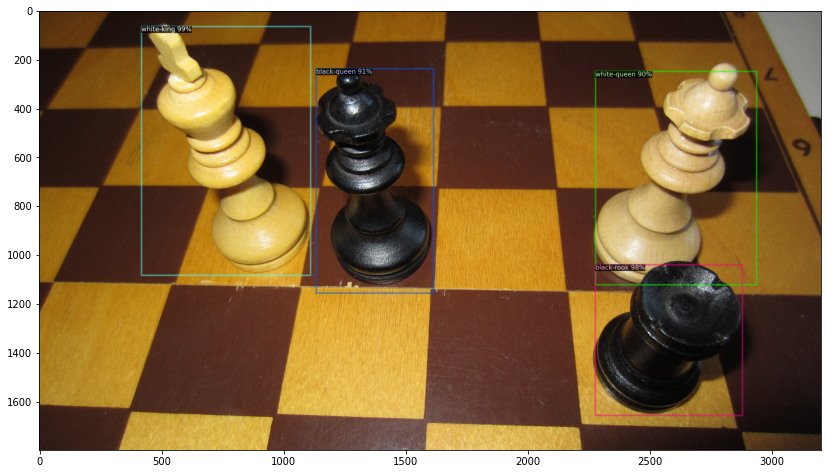

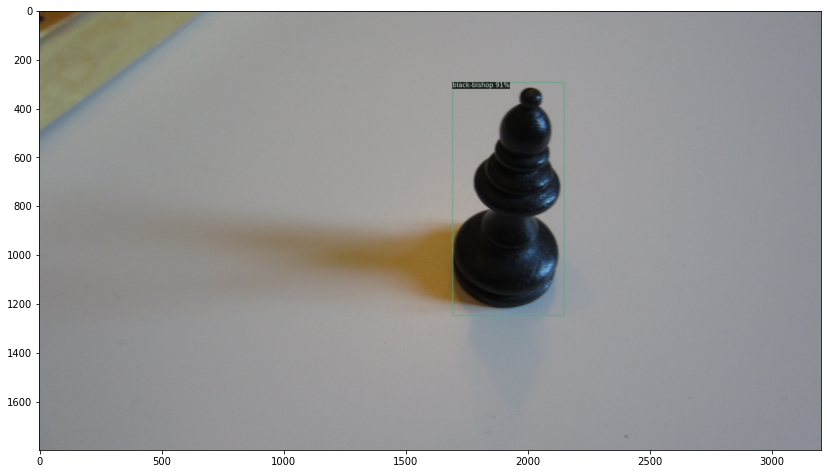

In [16]:
from detectron2.utils.visualizer import ColorMode
import random

dataset_dicts = DatasetCatalog.get('chess_piece_dataset')
for d in random.sample(dataset_dicts, 5):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], metadata=chess_metadata, scale=0.8)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()